In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 200
generations = int(1500/necoc)
generations

7

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

82


In [7]:
len(number_codes[0])

200

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:488
number of class2:1129

 ****** Running generation 0 ****** 

Population's average fitness: 0.51516 stdev: 0.14819
Best fitness: 0.77118 - size: (2, 13) - species 2 - id 49
Average adjusted fitness: 0.328
Mean genetic distance 2.971, standard deviation 0.505
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 36.386 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62648 stdev: 0.12339
Best fitness: 0.77984 - size: (3, 15) - species 5 - id 309
Average adjusted fitness: 0.327
Mean genetic distance 3.041, standard deviation 0.502
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 29.421 sec (32.903 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63231 stdev: 0.12135
Best fitness: 0.80148 - size: (2, 14) - species 18 - id 526
Average adjusted fitness: 0.326
Mean genetic distance 3.097, standard deviation 0.507
Population of 204 members in 34 species
Total extin

Population's average fitness: 0.55787 stdev: 0.07520
Best fitness: 0.77675 - size: (3, 17) - species 16 - id 698
Average adjusted fitness: 0.260
Mean genetic distance 3.003, standard deviation 0.473
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 30.404 sec (28.592 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56572 stdev: 0.08602
Best fitness: 0.77675 - size: (3, 17) - species 16 - id 698
Average adjusted fitness: 0.277
Mean genetic distance 3.050, standard deviation 0.478
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 30.550 sec (28.983 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58408 stdev: 0.07958
Best fitness: 0.77675 - size: (3, 17) - species 30 - id 698
Average adjusted fitness: 0.193
Mean genetic distance 3.033, standard deviation 0.491
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 31.071 sec (29.331 average)

 *****

Population's average fitness: 0.68427 stdev: 0.18337
Best fitness: 0.90538 - size: (2, 14) - species 20 - id 946
Average adjusted fitness: 0.491
Mean genetic distance 3.054, standard deviation 0.508
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 32.699 sec (31.159 average)
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.47573 stdev: 0.09396
Best fitness: 0.68955 - size: (2, 13) - species 2 - id 165
Average adjusted fitness: 0.196
Mean genetic distance 2.874, standard deviation 0.484
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 26.931 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53623 stdev: 0.09886
Best fitness: 0.74706 - size: (2, 13) - species 11 - id 255
Average adjusted fitness: 0.296
Mean genetic distance 2.925, standard deviation 0.462
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 28.192 sec 

Population's average fitness: 0.70679 stdev: 0.16297
Best fitness: 0.86889 - size: (2, 14) - species 6 - id 515
Average adjusted fitness: 0.488
Mean genetic distance 2.977, standard deviation 0.479
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 30.287 sec (30.314 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.71024 stdev: 0.17093
Best fitness: 0.86889 - size: (2, 14) - species 6 - id 515
Average adjusted fitness: 0.539
Mean genetic distance 3.020, standard deviation 0.469
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 30.098 sec (30.260 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.73316 stdev: 0.15300
Best fitness: 0.87384 - size: (4, 19) - species 29 - id 772
Average adjusted fitness: 0.535
Mean genetic distance 3.045, standard deviation 0.461
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 30.329 sec (30.273 average)

 ****** 

Population's average fitness: 0.65696 stdev: 0.13385
Best fitness: 0.83859 - size: (4, 16) - species 34 - id 524
Average adjusted fitness: 0.400
Mean genetic distance 3.139, standard deviation 0.448
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 25.175 sec (23.623 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.66994 stdev: 0.12867
Best fitness: 0.83859 - size: (4, 16) - species 34 - id 524
Average adjusted fitness: 0.370
Mean genetic distance 3.148, standard deviation 0.446
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 25.956 sec (23.956 average)
number of class1:642
number of class2:975

 ****** Running generation 0 ****** 

Population's average fitness: 0.52365 stdev: 0.08489
Best fitness: 0.68089 - size: (2, 13) - species 1 - id 51
Average adjusted fitness: 0.216
Mean genetic distance 2.939, standard deviation 0.517
Population of 201 members in 24 species
Total extinctions: 0
Generation t

Population's average fitness: 0.62422 stdev: 0.12014
Best fitness: 0.76685 - size: (3, 15) - species 1 - id 264
Average adjusted fitness: 0.341
Mean genetic distance 2.966, standard deviation 0.474
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 21.667 sec (20.958 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63194 stdev: 0.12241
Best fitness: 0.78541 - size: (3, 16) - species 1 - id 514
Average adjusted fitness: 0.386
Mean genetic distance 3.042, standard deviation 0.459
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 23.029 sec (21.648 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64694 stdev: 0.11280
Best fitness: 0.78541 - size: (3, 16) - species 28 - id 514
Average adjusted fitness: 0.344
Mean genetic distance 3.088, standard deviation 0.458
Population of 208 members in 36 species
Total extinctions: 0
Generation time: 23.902 sec (22.212 average)

 ****** 

Population's average fitness: 0.67805 stdev: 0.18864
Best fitness: 0.84725 - size: (4, 18) - species 9 - id 832
Average adjusted fitness: 0.443
Mean genetic distance 3.222, standard deviation 0.501
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 24.701 sec (22.789 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67393 stdev: 0.18546
Best fitness: 0.84725 - size: (4, 18) - species 9 - id 832
Average adjusted fitness: 0.447
Mean genetic distance 3.202, standard deviation 0.499
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 24.530 sec (23.079 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.71402 stdev: 0.16859
Best fitness: 0.84725 - size: (4, 18) - species 9 - id 832
Average adjusted fitness: 0.482
Mean genetic distance 3.195, standard deviation 0.497
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 24.680 sec (23.308 average)
number of 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50539 stdev: 0.09462
Best fitness: 0.71181 - size: (2, 13) - species 3 - id 135
Average adjusted fitness: 0.259
Mean genetic distance 2.911, standard deviation 0.468
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 20.399 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54951 stdev: 0.09964
Best fitness: 0.73531 - size: (3, 15) - species 18 - id 312
Average adjusted fitness: 0.279
Mean genetic distance 2.937, standard deviation 0.480
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 21.891 sec (21.145 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58948 stdev: 0.08761
Best fitness: 0.73531 - size: (3, 15) - species 18 - id 312
Average adjusted fitness: 0.286
Mean genetic distance 2.915, standard deviation 0.498
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 23.046 sec (21

Population's average fitness: 0.55222 stdev: 0.09443
Best fitness: 0.72727 - size: (3, 15) - species 27 - id 651
Average adjusted fitness: 0.269
Mean genetic distance 3.100, standard deviation 0.466
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 24.181 sec (22.170 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56086 stdev: 0.09020
Best fitness: 0.72727 - size: (3, 15) - species 26 - id 651
Average adjusted fitness: 0.224
Mean genetic distance 3.086, standard deviation 0.458
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 24.281 sec (22.593 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56969 stdev: 0.08712
Best fitness: 0.73840 - size: (5, 17) - species 4 - id 923
Average adjusted fitness: 0.173
Mean genetic distance 3.110, standard deviation 0.450
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 25.320 sec (23.047 average)

 ******

Population's average fitness: 0.63850 stdev: 0.12022
Best fitness: 0.77922 - size: (2, 16) - species 1 - id 964
Average adjusted fitness: 0.360
Mean genetic distance 3.104, standard deviation 0.510
Population of 209 members in 33 species
Total extinctions: 0
Generation time: 25.098 sec (23.248 average)
number of class1:974
number of class2:643

 ****** Running generation 0 ****** 

Population's average fitness: 0.47523 stdev: 0.08578
Best fitness: 0.66296 - size: (2, 13) - species 2 - id 119
Average adjusted fitness: 0.192
Mean genetic distance 2.882, standard deviation 0.469
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 20.072 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52965 stdev: 0.08684
Best fitness: 0.68584 - size: (3, 15) - species 12 - id 261
Average adjusted fitness: 0.220
Mean genetic distance 2.984, standard deviation 0.471
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 21.648 sec (

Population's average fitness: 0.58315 stdev: 0.15293
Best fitness: 0.80829 - size: (4, 16) - species 12 - id 433
Average adjusted fitness: 0.298
Mean genetic distance 2.937, standard deviation 0.469
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 23.593 sec (22.024 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62222 stdev: 0.13852
Best fitness: 0.81385 - size: (4, 16) - species 26 - id 689
Average adjusted fitness: 0.335
Mean genetic distance 2.963, standard deviation 0.470
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 24.209 sec (22.570 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63213 stdev: 0.12572
Best fitness: 0.81385 - size: (4, 16) - species 26 - id 689
Average adjusted fitness: 0.334
Mean genetic distance 2.991, standard deviation 0.465
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 24.223 sec (22.901 average)

 *****

Population's average fitness: 0.63750 stdev: 0.12026
Best fitness: 0.81262 - size: (4, 16) - species 35 - id 645
Average adjusted fitness: 0.338
Mean genetic distance 3.071, standard deviation 0.485
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 24.478 sec (22.857 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63568 stdev: 0.12651
Best fitness: 0.81262 - size: (4, 16) - species 35 - id 645
Average adjusted fitness: 0.344
Mean genetic distance 3.092, standard deviation 0.487
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 25.770 sec (23.273 average)
number of class1:483
number of class2:1134

 ****** Running generation 0 ****** 

Population's average fitness: 0.53995 stdev: 0.13470
Best fitness: 0.76067 - size: (2, 13) - species 1 - id 54
Average adjusted fitness: 0.270
Mean genetic distance 2.856, standard deviation 0.464
Population of 201 members in 19 species
Total extinctions: 0
Generation 

Population's average fitness: 0.53727 stdev: 0.10028
Best fitness: 0.78046 - size: (2, 13) - species 7 - id 17
Average adjusted fitness: 0.264
Mean genetic distance 3.021, standard deviation 0.500
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 21.595 sec (21.086 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56544 stdev: 0.09620
Best fitness: 0.78293 - size: (3, 15) - species 3 - id 492
Average adjusted fitness: 0.219
Mean genetic distance 2.989, standard deviation 0.490
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 22.212 sec (21.462 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58378 stdev: 0.09443
Best fitness: 0.78293 - size: (3, 15) - species 3 - id 492
Average adjusted fitness: 0.271
Mean genetic distance 3.020, standard deviation 0.491
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 22.803 sec (21.797 average)

 ****** Ru

Population's average fitness: 0.62897 stdev: 0.12562
Best fitness: 0.79839 - size: (4, 18) - species 39 - id 686
Average adjusted fitness: 0.331
Mean genetic distance 3.134, standard deviation 0.481
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 24.686 sec (22.761 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62465 stdev: 0.13399
Best fitness: 0.79839 - size: (4, 18) - species 39 - id 686
Average adjusted fitness: 0.312
Mean genetic distance 3.159, standard deviation 0.471
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 24.760 sec (23.094 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63653 stdev: 0.12695
Best fitness: 0.79839 - size: (4, 18) - species 39 - id 686
Average adjusted fitness: 0.365
Mean genetic distance 3.151, standard deviation 0.477
Population of 201 members in 47 species
Total extinctions: 0
Generation time: 25.214 sec (23.397 average)
number 


 ****** Running generation 0 ****** 

Population's average fitness: 0.51347 stdev: 0.08307
Best fitness: 0.68027 - size: (2, 13) - species 5 - id 158
Average adjusted fitness: 0.195
Mean genetic distance 2.947, standard deviation 0.454
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 20.302 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54742 stdev: 0.08099
Best fitness: 0.69944 - size: (3, 15) - species 20 - id 295
Average adjusted fitness: 0.222
Mean genetic distance 2.994, standard deviation 0.468
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 21.611 sec (20.956 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57352 stdev: 0.07186
Best fitness: 0.69944 - size: (3, 15) - species 20 - id 295
Average adjusted fitness: 0.187
Mean genetic distance 2.968, standard deviation 0.488
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 23.215 sec (21

Population's average fitness: 0.62921 stdev: 0.14401
Best fitness: 0.81447 - size: (3, 14) - species 19 - id 679
Average adjusted fitness: 0.339
Mean genetic distance 3.091, standard deviation 0.463
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 23.620 sec (22.032 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63963 stdev: 0.14316
Best fitness: 0.81447 - size: (3, 14) - species 19 - id 679
Average adjusted fitness: 0.393
Mean genetic distance 3.086, standard deviation 0.462
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 24.683 sec (22.562 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63347 stdev: 0.14988
Best fitness: 0.81447 - size: (3, 14) - species 19 - id 679
Average adjusted fitness: 0.407
Mean genetic distance 3.080, standard deviation 0.472
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 24.139 sec (22.825 average)

 *****

Population's average fitness: 0.60080 stdev: 0.09130
Best fitness: 0.79901 - size: (3, 16) - species 9 - id 974
Average adjusted fitness: 0.257
Mean genetic distance 3.137, standard deviation 0.502
Population of 209 members in 35 species
Total extinctions: 0
Generation time: 26.788 sec (24.168 average)
number of class1:976
number of class2:641

 ****** Running generation 0 ****** 

Population's average fitness: 0.48309 stdev: 0.10136
Best fitness: 0.73779 - size: (2, 13) - species 3 - id 128
Average adjusted fitness: 0.203
Mean genetic distance 2.902, standard deviation 0.485
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 20.572 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55388 stdev: 0.09023
Best fitness: 0.74583 - size: (2, 13) - species 4 - id 280
Average adjusted fitness: 0.206
Mean genetic distance 2.994, standard deviation 0.516
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 22.430 sec (2

Population's average fitness: 0.55591 stdev: 0.09458
Best fitness: 0.72851 - size: (3, 15) - species 4 - id 517
Average adjusted fitness: 0.270
Mean genetic distance 3.006, standard deviation 0.513
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 23.189 sec (22.421 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57556 stdev: 0.09258
Best fitness: 0.73284 - size: (4, 16) - species 27 - id 688
Average adjusted fitness: 0.236
Mean genetic distance 3.024, standard deviation 0.518
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 24.063 sec (22.832 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58978 stdev: 0.09050
Best fitness: 0.74335 - size: (5, 19) - species 22 - id 762
Average adjusted fitness: 0.184
Mean genetic distance 3.070, standard deviation 0.513
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 24.139 sec (23.093 average)

 ******

Population's average fitness: 0.59151 stdev: 0.06257
Best fitness: 0.70748 - size: (4, 19) - species 36 - id 717
Average adjusted fitness: 0.224
Mean genetic distance 3.123, standard deviation 0.499
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 25.496 sec (23.809 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58198 stdev: 0.07535
Best fitness: 0.70748 - size: (4, 19) - species 36 - id 717
Average adjusted fitness: 0.223
Mean genetic distance 3.140, standard deviation 0.492
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 24.672 sec (23.932 average)
number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.49216 stdev: 0.09540
Best fitness: 0.71490 - size: (2, 13) - species 1 - id 43
Average adjusted fitness: 0.214
Mean genetic distance 2.921, standard deviation 0.470
Population of 201 members in 24 species
Total extinctions: 0
Generation t

Population's average fitness: 0.53990 stdev: 0.08633
Best fitness: 0.71676 - size: (2, 13) - species 2 - id 36
Average adjusted fitness: 0.176
Mean genetic distance 2.974, standard deviation 0.443
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 22.745 sec (21.690 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55487 stdev: 0.08426
Best fitness: 0.71676 - size: (2, 13) - species 12 - id 36
Average adjusted fitness: 0.230
Mean genetic distance 3.021, standard deviation 0.467
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 24.095 sec (22.491 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57052 stdev: 0.08736
Best fitness: 0.71676 - size: (2, 13) - species 24 - id 36
Average adjusted fitness: 0.312
Mean genetic distance 3.030, standard deviation 0.467
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 24.507 sec (22.995 average)

 ****** Ru

Population's average fitness: 0.68726 stdev: 0.10917
Best fitness: 0.85714 - size: (4, 17) - species 2 - id 530
Average adjusted fitness: 0.465
Mean genetic distance 3.054, standard deviation 0.448
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 24.947 sec (22.823 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67833 stdev: 0.14171
Best fitness: 0.86580 - size: (5, 17) - species 2 - id 959
Average adjusted fitness: 0.366
Mean genetic distance 3.083, standard deviation 0.457
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 26.135 sec (23.375 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.68819 stdev: 0.12860
Best fitness: 0.88806 - size: (6, 21) - species 2 - id 1086
Average adjusted fitness: 0.386
Mean genetic distance 3.086, standard deviation 0.457
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 26.278 sec (23.790 average)
number of


 ****** Running generation 0 ****** 

Population's average fitness: 0.48447 stdev: 0.08459
Best fitness: 0.69511 - size: (2, 13) - species 2 - id 57
Average adjusted fitness: 0.178
Mean genetic distance 2.811, standard deviation 0.431
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 20.437 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53592 stdev: 0.08677
Best fitness: 0.69511 - size: (2, 13) - species 7 - id 57
Average adjusted fitness: 0.220
Mean genetic distance 2.956, standard deviation 0.465
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 21.928 sec (21.182 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55152 stdev: 0.07823
Best fitness: 0.69511 - size: (2, 13) - species 7 - id 57
Average adjusted fitness: 0.183
Mean genetic distance 3.015, standard deviation 0.457
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 23.192 sec (21.852 

Population's average fitness: 0.56526 stdev: 0.09057
Best fitness: 0.73284 - size: (3, 15) - species 5 - id 710
Average adjusted fitness: 0.212
Mean genetic distance 3.033, standard deviation 0.458
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 23.408 sec (22.230 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56987 stdev: 0.09213
Best fitness: 0.73284 - size: (3, 15) - species 2 - id 710
Average adjusted fitness: 0.219
Mean genetic distance 3.055, standard deviation 0.484
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 24.476 sec (22.679 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59249 stdev: 0.07654
Best fitness: 0.73655 - size: (4, 16) - species 19 - id 995
Average adjusted fitness: 0.202
Mean genetic distance 3.066, standard deviation 0.490
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 24.643 sec (23.006 average)

 ****** 

Population's average fitness: 0.59368 stdev: 0.08036
Best fitness: 0.78046 - size: (7, 24) - species 20 - id 1123
Average adjusted fitness: 0.235
Mean genetic distance 3.139, standard deviation 0.544
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 24.983 sec (23.390 average)
number of class1:966
number of class2:651

 ****** Running generation 0 ****** 

Population's average fitness: 0.47449 stdev: 0.10584
Best fitness: 0.71181 - size: (2, 13) - species 3 - id 10
Average adjusted fitness: 0.294
Mean genetic distance 2.880, standard deviation 0.485
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 20.638 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53805 stdev: 0.10719
Best fitness: 0.76871 - size: (3, 15) - species 8 - id 211
Average adjusted fitness: 0.262
Mean genetic distance 3.046, standard deviation 0.511
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 21.869 sec (

Population's average fitness: 0.60966 stdev: 0.13604
Best fitness: 0.80643 - size: (3, 14) - species 8 - id 211
Average adjusted fitness: 0.334
Mean genetic distance 3.037, standard deviation 0.461
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 22.739 sec (21.653 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60527 stdev: 0.15614
Best fitness: 0.80643 - size: (3, 14) - species 15 - id 211
Average adjusted fitness: 0.353
Mean genetic distance 3.091, standard deviation 0.473
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 23.905 sec (22.216 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61895 stdev: 0.13905
Best fitness: 0.80643 - size: (3, 14) - species 35 - id 211
Average adjusted fitness: 0.319
Mean genetic distance 3.119, standard deviation 0.480
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 24.823 sec (22.738 average)

 ******

Population's average fitness: 0.59807 stdev: 0.07525
Best fitness: 0.72913 - size: (5, 18) - species 32 - id 948
Average adjusted fitness: 0.229
Mean genetic distance 3.036, standard deviation 0.462
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 25.764 sec (24.050 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59709 stdev: 0.07885
Best fitness: 0.73160 - size: (4, 18) - species 2 - id 1061
Average adjusted fitness: 0.275
Mean genetic distance 3.056, standard deviation 0.455
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 26.570 sec (24.410 average)
number of class1:969
number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.49532 stdev: 0.10432
Best fitness: 0.74644 - size: (2, 13) - species 2 - id 168
Average adjusted fitness: 0.258
Mean genetic distance 2.968, standard deviation 0.466
Population of 201 members in 27 species
Total extinctions: 0
Generation 

Population's average fitness: 0.53033 stdev: 0.11259
Best fitness: 0.82004 - size: (2, 13) - species 5 - id 6
Average adjusted fitness: 0.284
Mean genetic distance 2.997, standard deviation 0.498
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 22.058 sec (21.529 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56098 stdev: 0.10600
Best fitness: 0.82004 - size: (2, 13) - species 7 - id 6
Average adjusted fitness: 0.272
Mean genetic distance 3.039, standard deviation 0.499
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 22.849 sec (21.969 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58440 stdev: 0.10602
Best fitness: 0.82004 - size: (2, 13) - species 1 - id 6
Average adjusted fitness: 0.240
Mean genetic distance 3.059, standard deviation 0.507
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 23.976 sec (22.471 average)

 ****** Running

Population's average fitness: 0.60015 stdev: 0.08904
Best fitness: 0.74583 - size: (3, 16) - species 10 - id 415
Average adjusted fitness: 0.298
Mean genetic distance 3.137, standard deviation 0.543
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 24.181 sec (22.968 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60967 stdev: 0.08159
Best fitness: 0.74583 - size: (3, 16) - species 18 - id 415
Average adjusted fitness: 0.261
Mean genetic distance 3.171, standard deviation 0.540
Population of 189 members in 36 species
Total extinctions: 0
Generation time: 23.597 sec (23.073 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61420 stdev: 0.08366
Best fitness: 0.74583 - size: (3, 16) - species 18 - id 415
Average adjusted fitness: 0.285
Mean genetic distance 3.180, standard deviation 0.531
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 24.065 sec (23.215 average)
number 


 ****** Running generation 0 ****** 

Population's average fitness: 0.47093 stdev: 0.15949
Best fitness: 0.79777 - size: (2, 13) - species 1 - id 24
Average adjusted fitness: 0.246
Mean genetic distance 2.871, standard deviation 0.500
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 21.140 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55738 stdev: 0.16108
Best fitness: 0.79777 - size: (2, 13) - species 8 - id 24
Average adjusted fitness: 0.297
Mean genetic distance 2.975, standard deviation 0.496
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 22.019 sec (21.580 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59521 stdev: 0.15301
Best fitness: 0.79777 - size: (2, 13) - species 18 - id 24
Average adjusted fitness: 0.328
Mean genetic distance 3.060, standard deviation 0.497
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 22.811 sec (21.990

Population's average fitness: 0.69385 stdev: 0.16458
Best fitness: 0.81509 - size: (3, 16) - species 24 - id 429
Average adjusted fitness: 0.488
Mean genetic distance 3.058, standard deviation 0.506
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 24.918 sec (22.738 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68457 stdev: 0.17531
Best fitness: 0.83859 - size: (3, 16) - species 24 - id 833
Average adjusted fitness: 0.482
Mean genetic distance 3.090, standard deviation 0.497
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 24.691 sec (23.129 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66751 stdev: 0.19223
Best fitness: 0.83859 - size: (3, 16) - species 24 - id 833
Average adjusted fitness: 0.469
Mean genetic distance 3.086, standard deviation 0.507
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 25.176 sec (23.470 average)

 *****

Population's average fitness: 0.67260 stdev: 0.13319
Best fitness: 0.85467 - size: (4, 15) - species 3 - id 1093
Average adjusted fitness: 0.371
Mean genetic distance 3.144, standard deviation 0.533
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 24.547 sec (23.101 average)
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.49940 stdev: 0.04813
Best fitness: 0.61719 - size: (2, 13) - species 3 - id 28
Average adjusted fitness: 0.199
Mean genetic distance 2.935, standard deviation 0.447
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 22.081 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52006 stdev: 0.04863
Best fitness: 0.67532 - size: (3, 14) - species 6 - id 372
Average adjusted fitness: 0.130
Mean genetic distance 2.957, standard deviation 0.479
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 22.726 sec (2

Population's average fitness: 0.59001 stdev: 0.11767
Best fitness: 0.82931 - size: (3, 14) - species 5 - id 520
Average adjusted fitness: 0.368
Mean genetic distance 3.038, standard deviation 0.488
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 23.179 sec (22.075 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61363 stdev: 0.10496
Best fitness: 0.83117 - size: (4, 16) - species 5 - id 685
Average adjusted fitness: 0.272
Mean genetic distance 3.103, standard deviation 0.491
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 23.827 sec (22.513 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61576 stdev: 0.10773
Best fitness: 0.83117 - size: (4, 16) - species 5 - id 685
Average adjusted fitness: 0.328
Mean genetic distance 3.147, standard deviation 0.487
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 24.388 sec (22.888 average)

 ****** R

Population's average fitness: 0.59378 stdev: 0.09517
Best fitness: 0.78912 - size: (2, 12) - species 23 - id 822
Average adjusted fitness: 0.274
Mean genetic distance 3.120, standard deviation 0.478
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 24.286 sec (22.965 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61588 stdev: 0.08716
Best fitness: 0.78912 - size: (2, 12) - species 23 - id 822
Average adjusted fitness: 0.229
Mean genetic distance 3.115, standard deviation 0.476
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 24.778 sec (23.224 average)
number of class1:1297
number of class2:320

 ****** Running generation 0 ****** 

Population's average fitness: 0.46076 stdev: 0.22688
Best fitness: 0.84168 - size: (2, 13) - species 1 - id 102
Average adjusted fitness: 0.272
Mean genetic distance 2.906, standard deviation 0.476
Population of 200 members in 18 species
Total extinctions: 0
Generation

Population's average fitness: 0.58112 stdev: 0.14665
Best fitness: 0.82684 - size: (2, 13) - species 1 - id 191
Average adjusted fitness: 0.357
Mean genetic distance 2.890, standard deviation 0.459
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 22.146 sec (21.397 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60710 stdev: 0.14186
Best fitness: 0.82684 - size: (2, 13) - species 19 - id 191
Average adjusted fitness: 0.332
Mean genetic distance 2.948, standard deviation 0.458
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 23.035 sec (21.943 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63687 stdev: 0.12596
Best fitness: 0.82684 - size: (2, 13) - species 19 - id 191
Average adjusted fitness: 0.334
Mean genetic distance 3.036, standard deviation 0.469
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 24.407 sec (22.559 average)

 ******

Population's average fitness: 0.74121 stdev: 0.14396
Best fitness: 0.88064 - size: (3, 16) - species 13 - id 504
Average adjusted fitness: 0.545
Mean genetic distance 3.093, standard deviation 0.494
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 24.525 sec (22.783 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.77059 stdev: 0.10008
Best fitness: 0.88064 - size: (3, 16) - species 2 - id 504
Average adjusted fitness: 0.565
Mean genetic distance 3.057, standard deviation 0.481
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 24.221 sec (23.022 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.75639 stdev: 0.13506
Best fitness: 0.88064 - size: (3, 16) - species 31 - id 504
Average adjusted fitness: 0.559
Mean genetic distance 3.038, standard deviation 0.480
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 24.977 sec (23.302 average)
number o


 ****** Running generation 0 ****** 

Population's average fitness: 0.52917 stdev: 0.14443
Best fitness: 0.73840 - size: (2, 13) - species 4 - id 65
Average adjusted fitness: 0.313
Mean genetic distance 2.946, standard deviation 0.489
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 19.105 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60114 stdev: 0.13973
Best fitness: 0.78850 - size: (3, 15) - species 24 - id 378
Average adjusted fitness: 0.377
Mean genetic distance 3.039, standard deviation 0.494
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 20.027 sec (19.566 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63241 stdev: 0.12624
Best fitness: 0.80148 - size: (3, 15) - species 14 - id 526
Average adjusted fitness: 0.340
Mean genetic distance 3.021, standard deviation 0.490
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 21.249 sec (20.

Population's average fitness: 0.62243 stdev: 0.12608
Best fitness: 0.80829 - size: (2, 14) - species 3 - id 491
Average adjusted fitness: 0.368
Mean genetic distance 3.084, standard deviation 0.471
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 18.497 sec (17.302 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63140 stdev: 0.13041
Best fitness: 0.82127 - size: (5, 19) - species 33 - id 698
Average adjusted fitness: 0.364
Mean genetic distance 3.074, standard deviation 0.469
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 19.308 sec (17.703 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63664 stdev: 0.12341
Best fitness: 0.82127 - size: (5, 19) - species 33 - id 698
Average adjusted fitness: 0.326
Mean genetic distance 3.103, standard deviation 0.461
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 19.428 sec (17.990 average)

 ******

Population's average fitness: 0.79170 stdev: 0.20145
Best fitness: 0.95980 - size: (4, 18) - species 25 - id 829
Average adjusted fitness: 0.663
Mean genetic distance 3.036, standard deviation 0.478
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 17.555 sec (17.105 average)
number of class1:803
number of class2:814

 ****** Running generation 0 ****** 

Population's average fitness: 0.49392 stdev: 0.07492
Best fitness: 0.69573 - size: (2, 13) - species 6 - id 83
Average adjusted fitness: 0.281
Mean genetic distance 2.853, standard deviation 0.449
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 14.365 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53563 stdev: 0.08642
Best fitness: 0.82127 - size: (3, 15) - species 10 - id 341
Average adjusted fitness: 0.271
Mean genetic distance 3.002, standard deviation 0.478
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 15.341 sec (

Population's average fitness: 0.62536 stdev: 0.13046
Best fitness: 0.82189 - size: (4, 17) - species 30 - id 543
Average adjusted fitness: 0.363
Mean genetic distance 3.025, standard deviation 0.480
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 10.036 sec (9.563 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66108 stdev: 0.11039
Best fitness: 0.82808 - size: (4, 18) - species 30 - id 679
Average adjusted fitness: 0.336
Mean genetic distance 3.047, standard deviation 0.494
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 10.355 sec (9.761 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65623 stdev: 0.12291
Best fitness: 0.83673 - size: (4, 16) - species 7 - id 802
Average adjusted fitness: 0.347
Mean genetic distance 3.104, standard deviation 0.474
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 10.867 sec (9.982 average)

 ****** Ru

Population's average fitness: 0.58586 stdev: 0.08505
Best fitness: 0.75943 - size: (4, 16) - species 11 - id 660
Average adjusted fitness: 0.242
Mean genetic distance 3.140, standard deviation 0.490
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 11.199 sec (10.501 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60178 stdev: 0.07720
Best fitness: 0.75943 - size: (4, 16) - species 11 - id 660
Average adjusted fitness: 0.202
Mean genetic distance 3.168, standard deviation 0.488
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 11.585 sec (10.656 average)
number of class1:1128
number of class2:489

 ****** Running generation 0 ****** 

Population's average fitness: 0.45828 stdev: 0.14595
Best fitness: 0.71614 - size: (2, 13) - species 2 - id 17
Average adjusted fitness: 0.202
Mean genetic distance 2.847, standard deviation 0.464
Population of 199 members in 21 species
Total extinctions: 0
Generation 

Population of 201 members in 18 species
Total extinctions: 0
Generation time: 9.244 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53134 stdev: 0.07215
Best fitness: 0.72171 - size: (2, 13) - species 8 - id 308
Average adjusted fitness: 0.220
Mean genetic distance 2.891, standard deviation 0.456
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 11.055 sec (10.149 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55545 stdev: 0.07233
Best fitness: 0.72171 - size: (2, 13) - species 8 - id 308
Average adjusted fitness: 0.172
Mean genetic distance 2.915, standard deviation 0.478
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 10.164 sec (10.154 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56866 stdev: 0.08048
Best fitness: 0.72665 - size: (3, 14) - species 8 - id 705
Average adjusted fitness: 0.171
Mean genetic distance 2.996, standard devia

Mean genetic distance 3.055, standard deviation 0.494
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.436 sec (7.942 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60038 stdev: 0.09737
Best fitness: 0.81014 - size: (2, 14) - species 30 - id 795
Average adjusted fitness: 0.299
Mean genetic distance 3.102, standard deviation 0.501
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.500 sec (8.053 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61201 stdev: 0.09611
Best fitness: 0.81014 - size: (2, 14) - species 30 - id 795
Average adjusted fitness: 0.360
Mean genetic distance 3.104, standard deviation 0.484
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.675 sec (8.157 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61465 stdev: 0.10451
Best fitness: 0.81014 - size: (2, 14) - species 25 - id 795
Averag

Mean genetic distance 3.208, standard deviation 0.494
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 8.933 sec (8.381 average)
number of class1:1457
number of class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.43690 stdev: 0.28176
Best fitness: 0.91342 - size: (2, 13) - species 2 - id 58
Average adjusted fitness: 0.324
Mean genetic distance 2.875, standard deviation 0.440
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 7.344 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64567 stdev: 0.26503
Best fitness: 0.91342 - size: (2, 13) - species 6 - id 58
Average adjusted fitness: 0.546
Mean genetic distance 3.024, standard deviation 0.456
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.868 sec (7.606 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.74046 stdev: 0.22088
Best fitness: 0.92270 - size: (3, 15) - spe

Population of 200 members in 25 species
Total extinctions: 0
Generation time: 8.427 sec (8.221 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56481 stdev: 0.08212
Best fitness: 0.72233 - size: (3, 16) - species 13 - id 697
Average adjusted fitness: 0.221
Mean genetic distance 3.037, standard deviation 0.486
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 8.832 sec (8.374 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57724 stdev: 0.08817
Best fitness: 0.73284 - size: (3, 15) - species 29 - id 823
Average adjusted fitness: 0.239
Mean genetic distance 3.110, standard deviation 0.493
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 9.094 sec (8.518 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58873 stdev: 0.08169
Best fitness: 0.74521 - size: (4, 17) - species 29 - id 1007
Average adjusted fitness: 0.208
Mean genetic distance 3.113

Mean genetic distance 3.135, standard deviation 0.477
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 9.108 sec (8.710 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.67621 stdev: 0.20505
Best fitness: 0.86085 - size: (5, 20) - species 29 - id 949
Average adjusted fitness: 0.482
Mean genetic distance 3.146, standard deviation 0.470
Population of 208 members in 36 species
Total extinctions: 0
Generation time: 8.882 sec (8.735 average)
number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.51987 stdev: 0.09430
Best fitness: 0.72975 - size: (2, 13) - species 1 - id 34
Average adjusted fitness: 0.227
Mean genetic distance 2.813, standard deviation 0.437
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 7.486 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57262 stdev: 0.08212
Best fitness: 0.72975 - size: (2, 13) - sp

Population of 202 members in 29 species
Total extinctions: 0
Generation time: 7.888 sec (7.587 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54662 stdev: 0.09310
Best fitness: 0.74954 - size: (3, 15) - species 2 - id 332
Average adjusted fitness: 0.215
Mean genetic distance 3.059, standard deviation 0.518
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.322 sec (7.832 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55994 stdev: 0.09933
Best fitness: 0.74954 - size: (3, 15) - species 6 - id 332
Average adjusted fitness: 0.243
Mean genetic distance 3.074, standard deviation 0.515
Population of 208 members in 36 species
Total extinctions: 0
Generation time: 8.654 sec (8.037 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57587 stdev: 0.10338
Best fitness: 0.74954 - size: (3, 15) - species 6 - id 332
Average adjusted fitness: 0.294
Mean genetic distance 3.124, st

Mean genetic distance 3.077, standard deviation 0.491
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 8.961 sec (8.388 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63107 stdev: 0.13002
Best fitness: 0.79221 - size: (3, 16) - species 16 - id 832
Average adjusted fitness: 0.383
Mean genetic distance 3.090, standard deviation 0.504
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 9.517 sec (8.577 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64895 stdev: 0.11241
Best fitness: 0.79221 - size: (3, 16) - species 16 - id 832
Average adjusted fitness: 0.345
Mean genetic distance 3.122, standard deviation 0.484
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 9.470 sec (8.704 average)
number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.48273 stdev: 0.07974
Best fitness: 0.71614 - 

Population's average fitness: 0.56363 stdev: 0.14491
Best fitness: 0.81818 - size: (3, 15) - species 14 - id 295
Average adjusted fitness: 0.324
Mean genetic distance 3.002, standard deviation 0.506
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 8.130 sec (7.838 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59946 stdev: 0.13269
Best fitness: 0.81818 - size: (3, 15) - species 14 - id 295
Average adjusted fitness: 0.305
Mean genetic distance 3.072, standard deviation 0.472
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 8.553 sec (8.076 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62709 stdev: 0.12199
Best fitness: 0.81818 - size: (3, 15) - species 14 - id 295
Average adjusted fitness: 0.330
Mean genetic distance 3.123, standard deviation 0.488
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.587 sec (8.204 average)

 ****** Runn

Population's average fitness: 0.57035 stdev: 0.09900
Best fitness: 0.77922 - size: (4, 15) - species 11 - id 691
Average adjusted fitness: 0.272
Mean genetic distance 3.017, standard deviation 0.513
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 8.848 sec (8.093 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58123 stdev: 0.09389
Best fitness: 0.77922 - size: (4, 15) - species 11 - id 691
Average adjusted fitness: 0.238
Mean genetic distance 3.046, standard deviation 0.538
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 9.186 sec (8.275 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58604 stdev: 0.09275
Best fitness: 0.77922 - size: (4, 15) - species 11 - id 691
Average adjusted fitness: 0.237
Mean genetic distance 3.080, standard deviation 0.526
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.886 sec (8.362 average)
number of cla

Population's average fitness: 0.43282 stdev: 0.20411
Best fitness: 0.81200 - size: (2, 13) - species 3 - id 113
Average adjusted fitness: 0.289
Mean genetic distance 2.855, standard deviation 0.476
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 7.429 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58323 stdev: 0.21625
Best fitness: 0.83364 - size: (3, 12) - species 4 - id 361
Average adjusted fitness: 0.411
Mean genetic distance 3.000, standard deviation 0.459
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 8.065 sec (7.747 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65317 stdev: 0.18717
Best fitness: 0.83364 - size: (3, 12) - species 4 - id 361
Average adjusted fitness: 0.461
Mean genetic distance 3.050, standard deviation 0.453
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 8.450 sec (7.981 average)

 ****** Running generation 3 **

Population's average fitness: 0.60045 stdev: 0.08161
Best fitness: 0.77675 - size: (2, 14) - species 18 - id 319
Average adjusted fitness: 0.250
Mean genetic distance 3.105, standard deviation 0.507
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 8.541 sec (8.153 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60007 stdev: 0.09484
Best fitness: 0.77675 - size: (2, 14) - species 18 - id 319
Average adjusted fitness: 0.322
Mean genetic distance 3.145, standard deviation 0.494
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 9.300 sec (8.382 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61425 stdev: 0.08422
Best fitness: 0.77675 - size: (2, 14) - species 2 - id 319
Average adjusted fitness: 0.238
Mean genetic distance 3.162, standard deviation 0.502
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 9.011 sec (8.487 average)

 ****** Runni

Population's average fitness: 0.65948 stdev: 0.13227
Best fitness: 0.85591 - size: (5, 16) - species 15 - id 1091
Average adjusted fitness: 0.391
Mean genetic distance 3.105, standard deviation 0.518
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 9.310 sec (8.502 average)
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.50073 stdev: 0.05287
Best fitness: 0.66729 - size: (2, 13) - species 1 - id 37
Average adjusted fitness: 0.160
Mean genetic distance 2.883, standard deviation 0.473
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.387 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53396 stdev: 0.05983
Best fitness: 0.68460 - size: (3, 15) - species 2 - id 244
Average adjusted fitness: 0.167
Mean genetic distance 3.017, standard deviation 0.494
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.939 sec (7.66

Population's average fitness: 0.65626 stdev: 0.12273
Best fitness: 0.79963 - size: (2, 12) - species 5 - id 524
Average adjusted fitness: 0.419
Mean genetic distance 2.932, standard deviation 0.457
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.211 sec (7.812 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65624 stdev: 0.13248
Best fitness: 0.80581 - size: (3, 14) - species 21 - id 649
Average adjusted fitness: 0.416
Mean genetic distance 2.950, standard deviation 0.471
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.252 sec (7.922 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64773 stdev: 0.14637
Best fitness: 0.80581 - size: (3, 14) - species 21 - id 649
Average adjusted fitness: 0.410
Mean genetic distance 2.982, standard deviation 0.473
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.574 sec (8.053 average)

 ****** Runni

Population's average fitness: 0.57107 stdev: 0.06496
Best fitness: 0.71861 - size: (4, 19) - species 32 - id 961
Average adjusted fitness: 0.160
Mean genetic distance 3.127, standard deviation 0.497
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 9.222 sec (8.407 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57536 stdev: 0.07004
Best fitness: 0.71861 - size: (4, 19) - species 32 - id 961
Average adjusted fitness: 0.199
Mean genetic distance 3.116, standard deviation 0.484
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 9.998 sec (8.634 average)
number of class1:1288
number of class2:329

 ****** Running generation 0 ****** 

Population's average fitness: 0.44375 stdev: 0.20397
Best fitness: 0.79963 - size: (2, 13) - species 6 - id 173
Average adjusted fitness: 0.304
Mean genetic distance 2.836, standard deviation 0.486
Population of 200 members in 20 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.53230 stdev: 0.06262
Best fitness: 0.69635 - size: (2, 14) - species 1 - id 310
Average adjusted fitness: 0.199
Mean genetic distance 2.942, standard deviation 0.474
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.669 sec (7.625 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54052 stdev: 0.06794
Best fitness: 0.74397 - size: (4, 15) - species 27 - id 509
Average adjusted fitness: 0.210
Mean genetic distance 3.011, standard deviation 0.493
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 8.177 sec (7.809 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55610 stdev: 0.07210
Best fitness: 0.74397 - size: (4, 15) - species 27 - id 509
Average adjusted fitness: 0.201
Mean genetic distance 3.041, standard deviation 0.474
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 8.993 sec (8.105 average)

 ****** Runni

Population's average fitness: 0.58119 stdev: 0.09314
Best fitness: 0.80148 - size: (2, 13) - species 23 - id 102
Average adjusted fitness: 0.329
Mean genetic distance 3.015, standard deviation 0.483
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 8.636 sec (8.155 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59625 stdev: 0.09161
Best fitness: 0.80148 - size: (2, 13) - species 23 - id 102
Average adjusted fitness: 0.194
Mean genetic distance 3.028, standard deviation 0.489
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 9.071 sec (8.308 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60099 stdev: 0.09502
Best fitness: 0.80148 - size: (2, 13) - species 23 - id 102
Average adjusted fitness: 0.210
Mean genetic distance 3.032, standard deviation 0.487
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 9.019 sec (8.409 average)
number of cla

Population's average fitness: 0.50473 stdev: 0.07153
Best fitness: 0.69388 - size: (2, 13) - species 1 - id 118
Average adjusted fitness: 0.219
Mean genetic distance 2.841, standard deviation 0.463
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 7.296 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54290 stdev: 0.07255
Best fitness: 0.75758 - size: (3, 14) - species 14 - id 351
Average adjusted fitness: 0.222
Mean genetic distance 2.900, standard deviation 0.484
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.117 sec (7.707 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55919 stdev: 0.08007
Best fitness: 0.75758 - size: (3, 14) - species 3 - id 351
Average adjusted fitness: 0.221
Mean genetic distance 2.957, standard deviation 0.496
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.511 sec (7.975 average)

 ****** Running generation 3 *

Population's average fitness: 0.58853 stdev: 0.07858
Best fitness: 0.73840 - size: (3, 15) - species 23 - id 489
Average adjusted fitness: 0.239
Mean genetic distance 3.079, standard deviation 0.492
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.517 sec (8.034 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58557 stdev: 0.08560
Best fitness: 0.73840 - size: (3, 15) - species 23 - id 489
Average adjusted fitness: 0.297
Mean genetic distance 3.099, standard deviation 0.516
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 8.718 sec (8.171 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60043 stdev: 0.08179
Best fitness: 0.73840 - size: (3, 15) - species 23 - id 489
Average adjusted fitness: 0.287
Mean genetic distance 3.143, standard deviation 0.496
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 9.282 sec (8.356 average)

 ****** Runn

Population's average fitness: 0.58828 stdev: 0.10257
Best fitness: 0.81880 - size: (5, 20) - species 3 - id 991
Average adjusted fitness: 0.253
Mean genetic distance 3.150, standard deviation 0.492
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 9.145 sec (8.440 average)
number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.52377 stdev: 0.09087
Best fitness: 0.72542 - size: (2, 13) - species 2 - id 11
Average adjusted fitness: 0.270
Mean genetic distance 2.867, standard deviation 0.434
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.164 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55962 stdev: 0.09177
Best fitness: 0.76685 - size: (3, 15) - species 22 - id 328
Average adjusted fitness: 0.191
Mean genetic distance 2.962, standard deviation 0.439
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.662 sec (7.413

In [9]:
len(winner_list)

200

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8777777777777778

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  2  0  0  0  0  1  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  1 11  0  0  0  0  1  1]
 [ 0  0  0  0 18  1  1  0  0  0]
 [ 0  0  0  2  0 17  0  0  0  1]
 [ 0  0  0  1  0  0 17  0  0  0]
 [ 0  0  0  2  1  0  0 19  1  2]
 [ 0  3  0  0  1  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


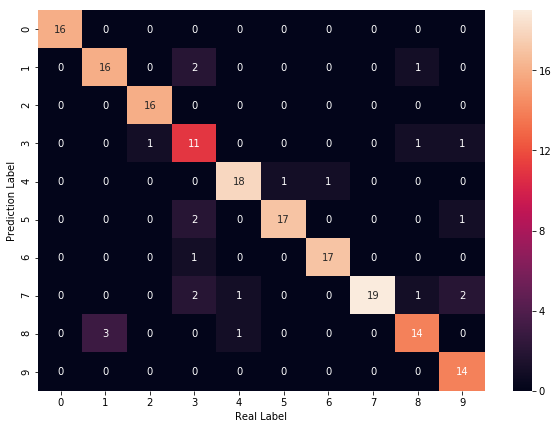

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:56 index:[5] real:5
#1 min_error:60 index:[3] real:2
#2 min_error:57 index:[8] real:8
#3 min_error:19 index:[0] real:0
#4 min_error:37 index:[1] real:1
#5 min_error:34 index:[7] real:7
#6 min_error:34 index:[6] real:6
#7 min_error:41 index:[3] real:3
#8 min_error:36 index:[2] real:2
#9 min_error:42 index:[1] real:1
#10 min_error:53 index:[7] real:7
#11 min_error:66 index:[7] real:4
#12 min_error:33 index:[6] real:6
#13 min_error:43 index:[3] real:3
#14 min_error:40 index:[1] real:1
#15 min_error:59 index:[3] real:3
#16 min_error:55 index:[7] real:9
#17 min_error:36 index:[1] real:1
#18 min_error:45 index:[7] real:7
#19 min_error:28 index:[6] real:6
#20 min_error:54 index:[8] real:8
#21 min_error:33 index:[4] real:4
#22 min_error:42 index:[3] real:3
#23 min_error:46 index:[1] real:1
#24 min_error:37 index:[4] real:4
#25 min_error:17 index:[0] real:0
#26 min_error:40 index:[5] real:5
#27 min_error:43 index:[3] real:3
#28 min_error:61 index:[6] real:6
#29 min_error:53 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8849721706864564
Avg Base Learner:0.7897619047619048


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.13333333333333333
Accuracy on training set: 0.10555555555555556
Accuracy on training set: 0.12222222222222222
Accuracy on training set: 0.19444444444444445
Accuracy on training set: 0.2611111111111111
Accuracy on training set: 0.2388888888888889
Accuracy on training set: 0.2777777777777778
Accuracy on training set: 0.39444444444444443
Accuracy on training set: 0.43333333333333335
Accuracy on training set: 0.4888888888888889
Accuracy on training set: 0.4777777777777778
Accuracy on training set: 0.45
Accuracy on training set: 0.4444444444444444
Accuracy on training set: 0.48333333333333334
Accuracy on training set: 0.5055555555555555
Accuracy on training set: 0.6277777777777778
Accuracy on training set: 0.5833333333333334
Accuracy on training set: 0.6222222222222222
Accuracy on training set: 0.6166666666666667
Accuracy on training set: 0.65
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6277777777777778
Accuracy on training set: 0.661

Accuracy on training set: 0.8722222222222222
Accuracy on training set: 0.8611111111111112
Accuracy on training set: 0.8666666666666667
Accuracy on training set: 0.8722222222222222
Accuracy on training set: 0.8777777777777778
Accuracy on training set: 0.8777777777777778
Accuracy on training set: 0.8833333333333333
Accuracy on training set: 0.8833333333333333


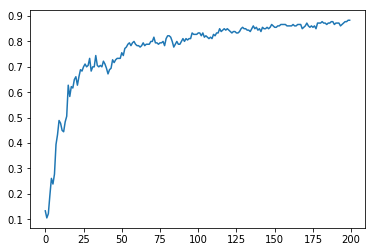

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
list_acc

[0.13333333333333333,
 0.10555555555555556,
 0.12222222222222222,
 0.19444444444444445,
 0.2611111111111111,
 0.2388888888888889,
 0.2777777777777778,
 0.39444444444444443,
 0.43333333333333335,
 0.4888888888888889,
 0.4777777777777778,
 0.45,
 0.4444444444444444,
 0.48333333333333334,
 0.5055555555555555,
 0.6277777777777778,
 0.5833333333333334,
 0.6222222222222222,
 0.6166666666666667,
 0.65,
 0.6611111111111111,
 0.6277777777777778,
 0.6611111111111111,
 0.6888888888888889,
 0.6833333333333333,
 0.7,
 0.7111111111111111,
 0.7,
 0.7055555555555556,
 0.7333333333333333,
 0.6833333333333333,
 0.7,
 0.7,
 0.7444444444444445,
 0.7055555555555556,
 0.7,
 0.7055555555555556,
 0.7,
 0.7222222222222222,
 0.7111111111111111,
 0.6944444444444444,
 0.6722222222222223,
 0.6888888888888889,
 0.6944444444444444,
 0.7277777777777777,
 0.7166666666666667,
 0.7277777777777777,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7555555555555555,
 0.7444444444444445,
 0.7722222222222223